# Momentum

A stock that's going up tends to keep going up...until it doesn't.  Momentum is the theory that stocks that have recently gone up will keep going up disproportionate to their underlying value because folks are overenthusiastic about them.

    On the first trading day of each week
    1. The SPY is higher than 'lookback' months ago, buy
    2. If the SPY is lower than 'lookback' months ago, sell your long position.
    
    The 'lookback' time period can be random, meaning a random lookback period is used for each new position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'lookback': None,
    'margin': 1
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [6]:
s.tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
18,2011-10-10,99.10,2011-11-21,99.16,0.07,35.27,532,42786.50,LONG,SPY
19,2012-01-03,106.33,2012-01-23,109.76,3.43,1700.11,496,44486.60,LONG,SPY
20,2012-01-30,109.56,2015-08-24,169.60,60.04,29838.32,497,74324.93,LONG,SPY
21,2015-09-14,175.42,2015-12-21,182.51,7.08,3400.11,480,77725.04,LONG,SPY
22,2015-12-28,185.71,2016-01-04,181.92,-3.79,-1789.77,472,75935.27,LONG,SPY
23,2016-03-21,186.18,2016-03-28,184.88,-1.30,-599.68,461,75335.59,LONG,SPY
24,2016-04-04,187.61,2016-06-27,182.51,-5.10,-2317.62,454,73017.97,LONG,SPY
25,2016-07-05,190.56,2018-12-10,252.11,61.54,26771.86,435,99789.83,LONG,SPY
26,2019-02-11,259.87,2020-03-09,268.32,8.45,3567.22,422,103357.05,LONG,SPY
27,2020-05-26,294.36,2021-04-09,411.49,117.13,45095.26,385,148452.31,LONG,SPY


In [7]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-04-05,156700.57,155329.97,156477.26,385,28.67,1.00,-
2021-04-06,156816.06,156107.67,156384.87,385,28.67,1.00,-
2021-04-07,156708.26,156126.92,156565.82,385,28.67,1.00,-
2021-04-08,157331.96,156696.71,157308.86,385,28.67,1.00,-
2021-04-09,158452.31,158452.31,158452.31,0,158452.31,1.00,X


Generate strategy stats - display all available stats

In [8]:
pf.print_full(s.stats)

start                                                  1994-07-05
end                                                    2021-04-09
beginning_balance                                           10000
ending_balance                                          158452.31
total_net_profit                                        148452.31
gross_profit                                            163100.56
gross_loss                                              -14648.25
profit_factor                                               11.13
return_on_initial_capital                                 1484.52
annual_return_rate                                          10.88
trading_period                           26 years 9 months 4 days
pct_time_in_market                                          82.66
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

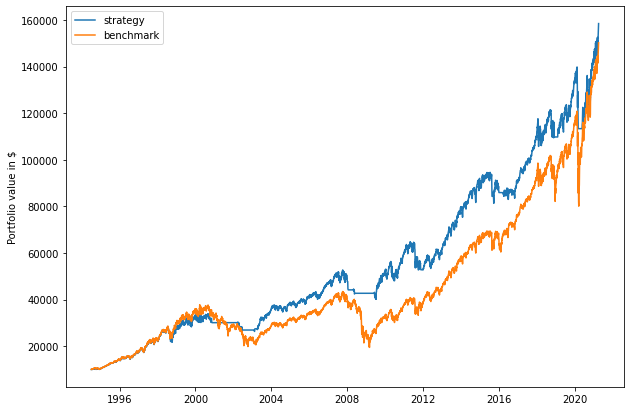

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

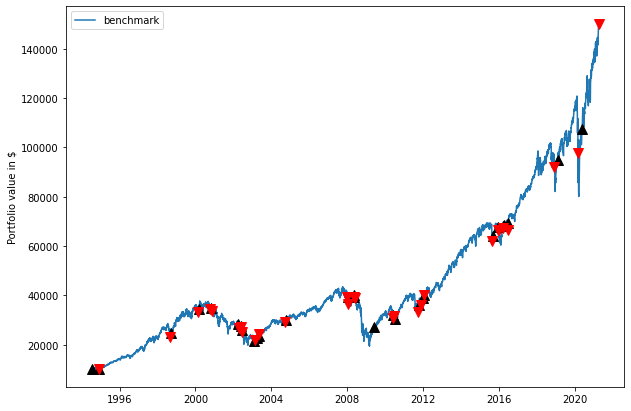

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,10.88,10.65
max_closed_out_drawdown,-23.77,-55.19
annualized_return_over_max_drawdown,0.46,0.19
best_month,17.75,23.62
worst_month,-18.93,-30.99
sharpe_ratio,0.81,0.62
sortino_ratio,0.94,0.79
monthly_std,3.50,4.56
annual_std,13.51,17.15


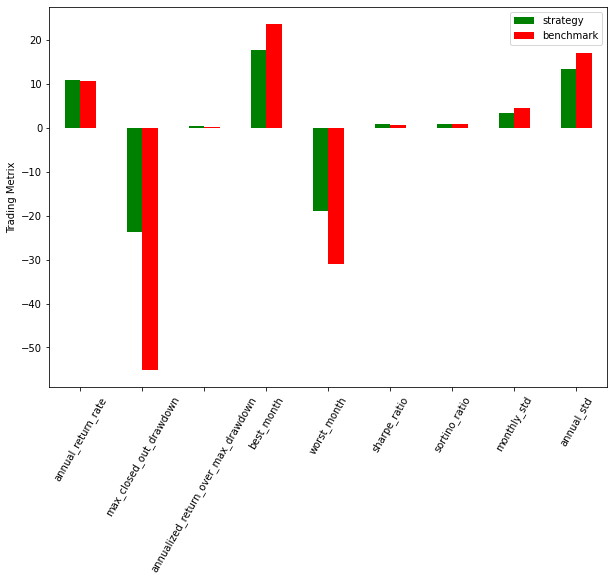

In [12]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df